# EDA Practice Task

This task involves performing Exploratory Data Analysis (EDA) on a real-world dataset. 
It will demonstrate how to generate data summaries, conduct univariate and multivariate analyses, and evaluate feature correlations.

Dataset for this EDA: https://www.kaggle.com/code/mjamilmoughal/eda-of-titanic-dataset-with-python-analysis 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

From the titanic dataset, we will only use the `train.csv` since we will visualize the relationship using `Survived` column in later steps

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Describe the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on the summary of the DataFrame, there are 5 categorical variables.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check for missing values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plot the Age Distribution

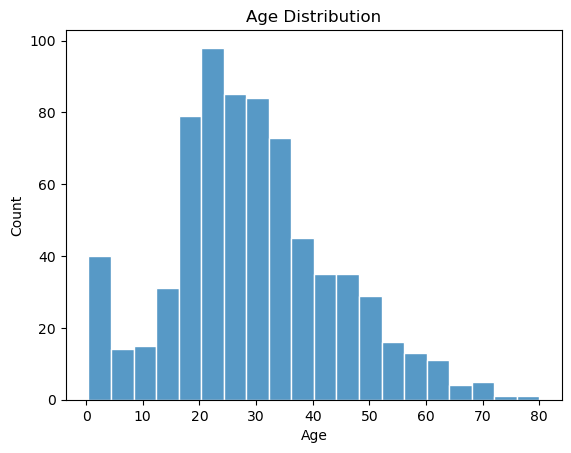

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram
sns.histplot(df['Age'].dropna(), edgecolor='white')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


Based on the age distribution, most passengers are in their 20s - 30s. However, there are still many missing values in this feature!

### Impute the Missing Values

If we impute the `Age` missing values with just the `Age` median, a spike will apear around the median value because suddenly many people have the same `Age` value. 

Therefore, we want to impute based on the median of `Pclass` and `Sex` Groups

In [7]:
# Fill missing Age with median of Pclass and Sex groups
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [8]:
df['Age'].isna().sum()

np.int64(0)

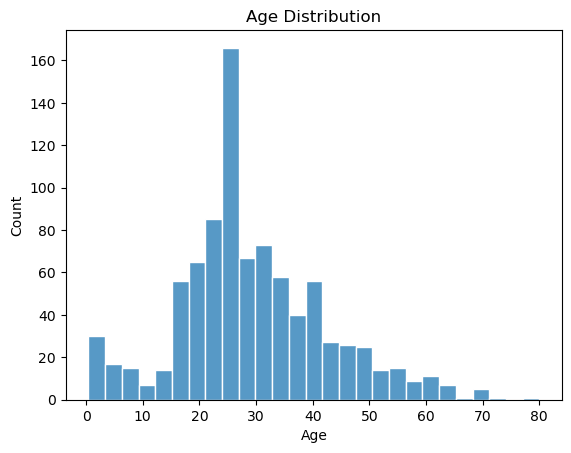

In [9]:
# Plot the histogram
sns.histplot(df['Age'], edgecolor='white')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

### Gender vs. Survival

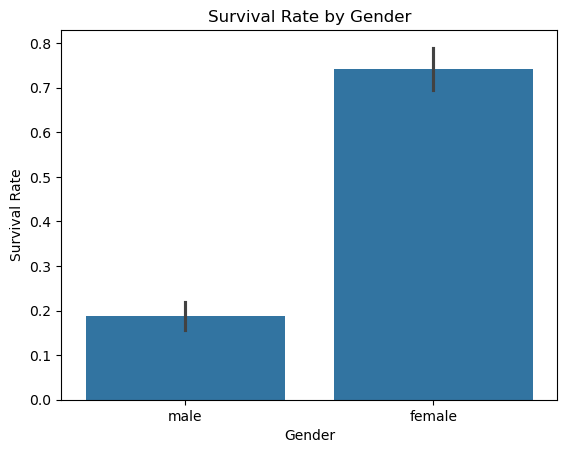

In [10]:
# Show gender vs survival using a barplot
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

As we can see, females have higher survival rate compared to males

### Heatmap for Correlation

Since correlation are only valid for numerical values, we want to select the features that are relevant.

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# drop irrelevant columns
new_df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,21.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Although `Sex` and `Embarked` are categorical, we still want to include them in our heatmap correlation due to the fact that they may have a strong relationship with the target variable (`Survived`), and encoding them into numerical values allows us to measure their correlation quantitatively.

In [13]:
# Encode 'Sex' (binary: 0 or 1)
new_df['Sex_encoded'] = new_df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' (simple mapping)
new_df['Embarked_encoded'] = new_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

new_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,male,22.0,1,0,7.2500,S,0,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,1,1.0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0.0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0.0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,0.0
887,888,1,1,female,19.0,0,0,30.0000,S,1,0.0
888,889,0,3,female,21.5,1,2,23.4500,S,1,0.0
889,890,1,1,male,26.0,0,0,30.0000,C,0,1.0


Remove the un-encoded categorical columns.

In [14]:
new_df = new_df.drop(columns=['Sex', 'Embarked'])
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,1,0,3,22.0,1,0,7.2500,0,0.0
1,2,1,1,38.0,1,0,71.2833,1,1.0
2,3,1,3,26.0,0,0,7.9250,1,0.0
3,4,1,1,35.0,1,0,53.1000,1,0.0
4,5,0,3,35.0,0,0,8.0500,0,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0.0
887,888,1,1,19.0,0,0,30.0000,1,0.0
888,889,0,3,21.5,1,2,23.4500,1,0.0
889,890,1,1,26.0,0,0,30.0000,0,1.0


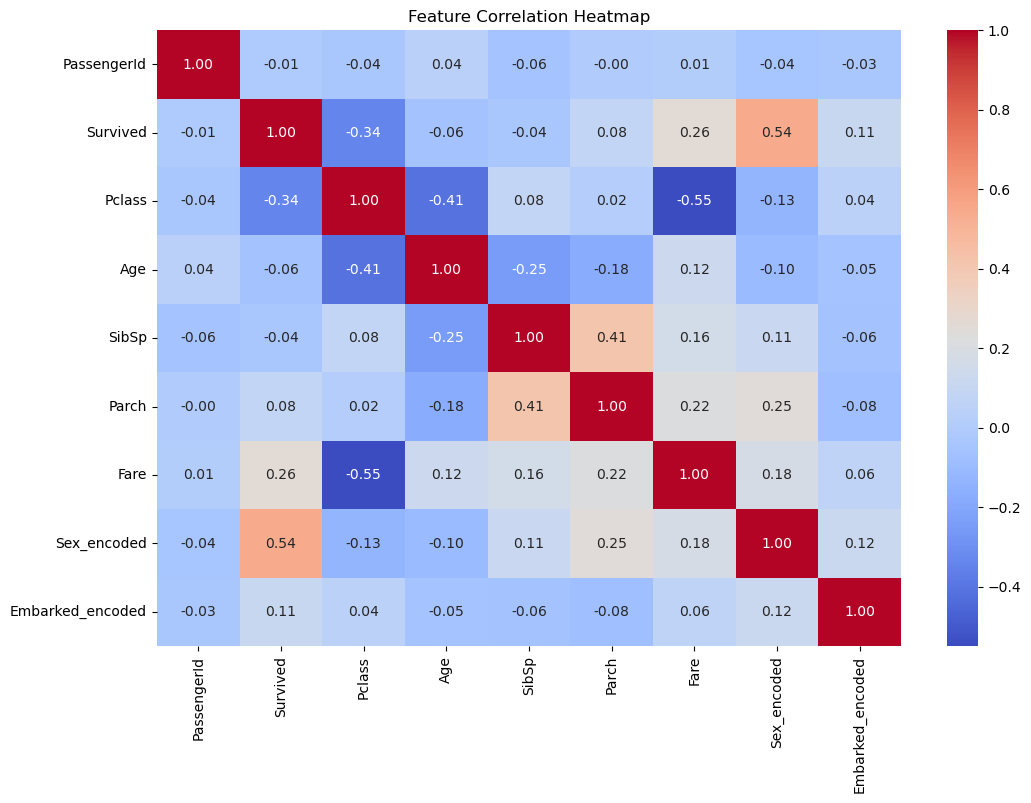

In [15]:
# Plot heatmap for feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Conclusion

`Sex` is the most powerful predictors of survival, followed by `Fare` that indirectly captures social class (and thus survival advantage).
